## Import libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind

## Load dataset

In [35]:
data = pd.read_csv('ab_testing.csv')

## Exploring the Dataset

In [36]:
print(data.info())
print(data.describe())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User ID     5000 non-null   int64 
 1   Group       5000 non-null   object
 2   Page Views  5000 non-null   int64 
 3   Time Spent  5000 non-null   int64 
 4   Conversion  5000 non-null   object
 5   Device      5000 non-null   object
 6   Location    5000 non-null   object
dtypes: int64(3), object(4)
memory usage: 273.6+ KB
None
            User ID   Page Views   Time Spent
count   5000.000000  5000.000000  5000.000000
mean   14925.159000     7.537600   242.512600
std     2869.153773     4.022465   118.254153
min    10001.000000     1.000000    40.000000
25%    12456.250000     4.000000   137.000000
50%    14858.500000     8.000000   243.000000
75%    17379.750000    11.000000   346.000000
max    19995.000000    14.000000   449.000000
   User ID Group  Page Views  Time Spent Conversion   Device   

## Cleaning the Dataset

### 1) Check missing values

In [37]:
print("Missing values:")
print(data.isnull().sum())

Missing values:
User ID       0
Group         0
Page Views    0
Time Spent    0
Conversion    0
Device        0
Location      0
dtype: int64


### 2) Dropping duplicates if any

In [38]:
data.drop_duplicates(inplace=True)

### 3)  Clean column names

In [39]:
data.columns = data.columns.str.strip()

## Exploratory Data Analysis

### 1) Visualize the distribution of conversion rates by group

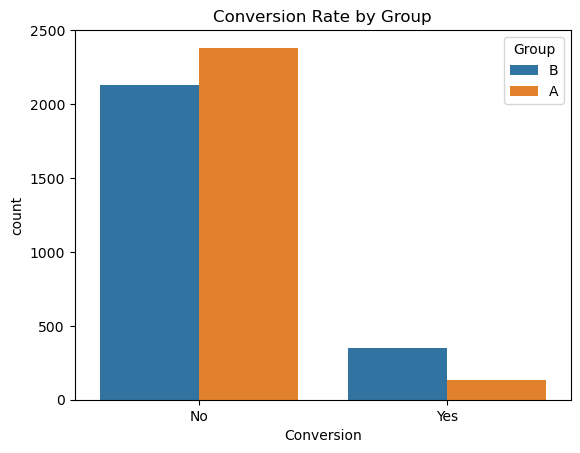

In [40]:
sns.countplot(data=data, x='Conversion', hue='Group')
plt.title('Conversion Rate by Group')
plt.show()

### 2) Visualize average time spent by group

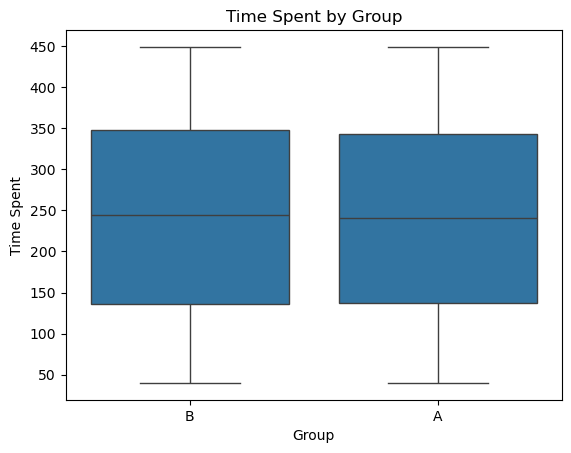

In [41]:
sns.boxplot(data=data, x='Group', y='Time Spent')
plt.title('Time Spent by Group')
plt.show()

## Statistical Testing

In [42]:
# Null Hypothesis (H0): No significant difference in conversion rates between groups
# Alternative Hypothesis (H1): Significant difference in conversion rates between groups


In [43]:
grouped_data = data.groupby('Group')['Conversion'].value_counts().unstack()
chi2, p, dof, expected = chi2_contingency(grouped_data)
print(f"Chi-squared Test:\nChi2 = {chi2}, p-value = {p}")

Chi-squared Test:
Chi2 = 106.22812337440538, p-value = 6.571736018334222e-25


In [44]:
# If p < 0.05, we reject the null hypothesis
if p < 0.05:
    print("There is a significant difference in conversion rates between groups.")
else:
    print("No significant difference in conversion rates between groups.")


There is a significant difference in conversion rates between groups.


### T-test for Time Spent

In [45]:
time_spent_a = data[data['Group'] == 'A']['Time Spent']
time_spent_b = data[data['Group'] == 'B']['Time Spent']

stat, p_value = ttest_ind(time_spent_a, time_spent_b)
print(f"T-Test for Time Spent:\nStatistic = {stat}, p-value = {p_value}")


T-Test for Time Spent:
Statistic = -0.46954858146462514, p-value = 0.6386980515632602


In [49]:
if p_value < 0.05:
    print("There is a significant difference in time spent between groups.")
else:
    print("No significant difference in time spent between groups.")


No significant difference in time spent between groups.


## Actionable Insights and Conclusions

In [47]:
# Based on the statistical tests and visualizations

In [48]:
print("\nConclusions:")
if p < 0.05:
    print("The change/intervention has a significant impact on conversion rates.")
else:
    print("The change/intervention does not have a significant impact on conversion rates.")

if p_value < 0.05:
    print("The time spent by users is significantly different between the groups. This might need further investigation.")
else:
    print("No significant difference in time spent by users between the groups.")



Conclusions:
The change/intervention has a significant impact on conversion rates.
No significant difference in time spent by users between the groups.
